# **This notebook tracks the spread of the novel coronavirus, also known as SARS-CoV-2. It is a contagious respiratory virus that first started in Wuhan in December 2019. On 2/11/2020, the disease is officially named COVID-19 by the World Health Organization.**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/

In [2]:
data=pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
24823,24824,05/14/2020,Wyoming,US,2020-05-15 02:33:02,701.0,7.0,0.0
24824,24825,05/14/2020,Xinjiang,Mainland China,2020-05-15 02:33:02,76.0,3.0,73.0
24825,24826,05/14/2020,Yukon,Canada,2020-05-15 02:33:02,11.0,0.0,11.0
24826,24827,05/14/2020,Yunnan,Mainland China,2020-05-15 02:33:02,185.0,2.0,183.0
24827,24828,05/14/2020,Zhejiang,Mainland China,2020-05-15 02:33:02,1268.0,1.0,1267.0


In [3]:
data['ObservationDate']=pd.to_datetime(data['ObservationDate'])


In [4]:
print('Shape of dataset :')
data.shape
print('Data types :')
data.dtypes

Shape of dataset :
Data types :


SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [5]:
print('NULL Values :')
data.isna().sum()

NULL Values :


SNo                    0
ObservationDate        0
Province/State     12926
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
print('Dropping the  Province/State columns as it has many null values')
#data.drop(['Province/State'],axis=1,inplace=True)


Dropping the  Province/State columns as it has many null values


In [7]:
data.set_index(['SNo'])

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
24824,2020-05-14,Wyoming,US,2020-05-15 02:33:02,701.0,7.0,0.0
24825,2020-05-14,Xinjiang,Mainland China,2020-05-15 02:33:02,76.0,3.0,73.0
24826,2020-05-14,Yukon,Canada,2020-05-15 02:33:02,11.0,0.0,11.0


In [8]:
datewise=data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise.tail()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-05-10,4101699.0,1408980.0,282709.0
2020-05-11,4177504.0,1456209.0,286330.0
2020-05-12,4261955.0,1493414.0,291964.0
2020-05-13,4347018.0,1548547.0,297197.0
2020-05-14,4442163.0,1587893.0,302418.0


In [9]:
print('Corona affected countries :')
for i in data['Country/Region'].unique():
    print(i)


Corona affected countries :
Mainland China
Hong Kong
Macau
Taiwan
US
Japan
Thailand
South Korea
Singapore
Philippines
Malaysia
Vietnam
Australia
Mexico
Brazil
Colombia
France
Nepal
Canada
Cambodia
Sri Lanka
Ivory Coast
Germany
Finland
United Arab Emirates
India
Italy
UK
Russia
Sweden
Spain
Belgium
Others
Egypt
Iran
Israel
Lebanon
Iraq
Oman
Afghanistan
Bahrain
Kuwait
Austria
Algeria
Croatia
Switzerland
Pakistan
Georgia
Greece
North Macedonia
Norway
Romania
Denmark
Estonia
Netherlands
San Marino
 Azerbaijan
Belarus
Iceland
Lithuania
New Zealand
Nigeria
North Ireland
Ireland
Luxembourg
Monaco
Qatar
Ecuador
Azerbaijan
Czech Republic
Armenia
Dominican Republic
Indonesia
Portugal
Andorra
Latvia
Morocco
Saudi Arabia
Senegal
Argentina
Chile
Jordan
Ukraine
Saint Barthelemy
Hungary
Faroe Islands
Gibraltar
Liechtenstein
Poland
Tunisia
Palestine
Bosnia and Herzegovina
Slovenia
South Africa
Bhutan
Cameroon
Costa Rica
Peru
Serbia
Slovakia
Togo
Vatican City
French Guiana
Malta
Martinique
Republic of 

In [10]:
sum=0
print('Total countries affected :')
len(data['Country/Region'].unique())

Total countries affected :


223

In [11]:
print('Total number of deaths :',datewise['Deaths'].iloc[-1])
print('Total recovered patients :',datewise['Recovered'].iloc[-1])
print('Total CURRENT cases :',datewise['Confirmed'].iloc[-1]-datewise['Recovered'].iloc[-1]-datewise['Deaths'].iloc[-1])
print('Recovered cases per DAY around the world :',np.round(datewise['Recovered'].iloc[-1]/datewise.shape[0]))
print('Death  cases per DAY around the world :',np.round(datewise['Recovered'].iloc[-1]/datewise.shape[0]))
print('Confirmed cases per DAY around the world :',np.round(datewise['Recovered'].iloc[-1]/datewise.shape[0]))
print("Number of Death Cases per DAY around the World: ",np.round(datewise["Deaths"].iloc[-1]/(datewise.shape[0])))
print("Number of Death Cases per HOUR around the World: ",np.round(datewise["Deaths"].iloc[-1]/(datewise.shape[0])*24))

Total number of deaths : 302418.0
Total recovered patients : 1587893.0
Total CURRENT cases : 2551852.0
Recovered cases per DAY around the world : 13929.0
Death  cases per DAY around the world : 13929.0
Confirmed cases per DAY around the world : 13929.0
Number of Death Cases per DAY around the World:  2653.0
Number of Death Cases per HOUR around the World:  63667.0


## Visualizing Data

Text(0.5, 1.0, 'Deaths Per day World Wide')

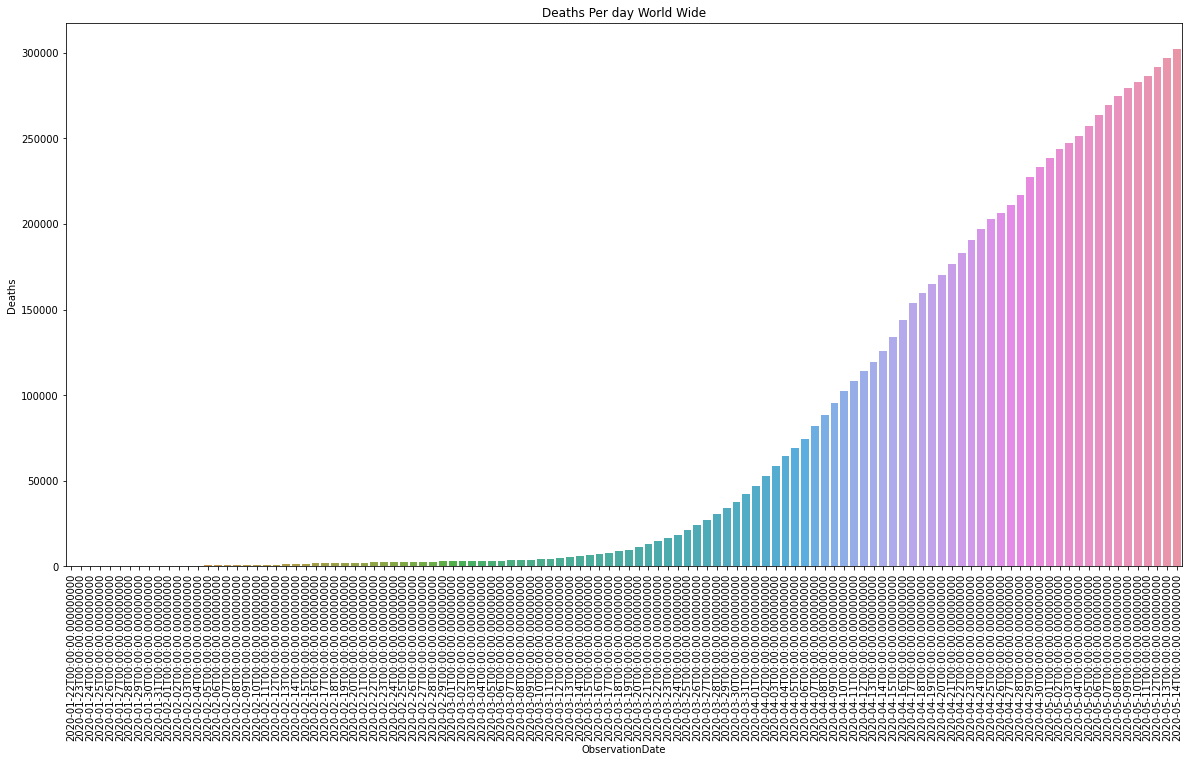

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x=datewise.index,y=datewise['Deaths'])
plt.xticks(rotation=90)
plt.title('Deaths Per day World Wide')

In [13]:
china=data[data["Country/Region"]=="Mainland China"]
Italy=data[data["Country/Region"]=="Italy"]
US=data[data["Country/Region"]=="US"]
spain=data[data["Country/Region"]=="Spain"]
date_china=china.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
date_Italy=Italy.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
date_US=US.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
date_spain=spain.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})



In [14]:
#Death Rate in China-Italy-Spain-US

date_china["DeathRate"]=(date_china["Deaths"]/date_china["Confirmed"])*100
date_Italy["DeathRate"]=(date_Italy["Deaths"]/date_Italy["Confirmed"])*100
date_US["DeathRate"]=(date_US["Deaths"]/date_US["Confirmed"])*100
date_spain["DeathRate"]=(date_spain["Deaths"]/date_spain["Confirmed"])*100


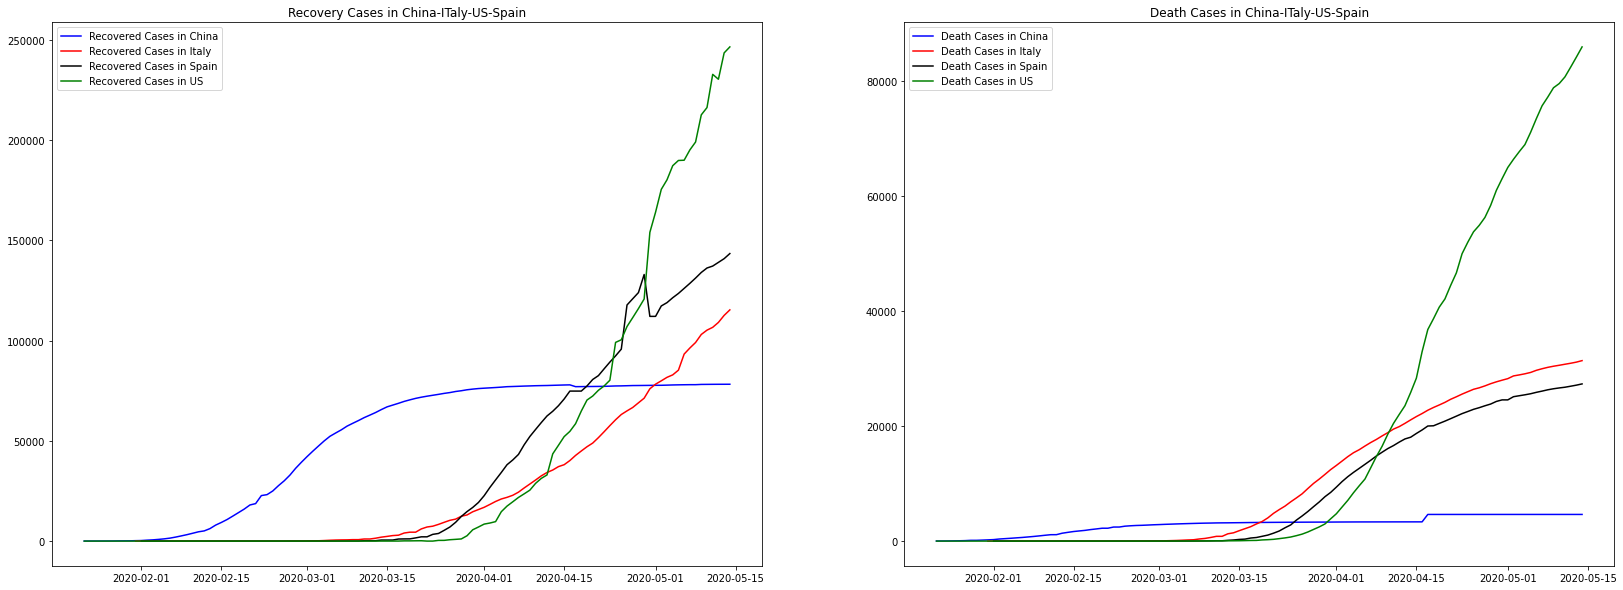

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(28,10))
#Recovery Cases
ax1.plot(date_china['Recovered'],color='b',label='Recovered Cases in China')
ax1.plot(date_Italy['Recovered'],color='r',label='Recovered Cases in Italy')
ax1.plot(date_spain['Recovered'],color='k',label='Recovered Cases in Spain')
ax1.plot(date_US['Recovered'],color='g',label='Recovered Cases in US')
ax1.set_title('Recovery Cases in China-ITaly-US-Spain')
ax1.legend()
#Death cases
ax2.plot(date_china['Deaths'],color='b',label='Death Cases in China')
ax2.plot(date_Italy['Deaths'],color='r',label='Death Cases in Italy')
ax2.plot(date_spain['Deaths'],color='k',label='Death Cases in Spain')
ax2.plot(date_US['Deaths'],color='g',label='Death Cases in US')
ax2.set_title('Death Cases in China-ITaly-US-Spain')
ax2.legend()



In [ ]:
plt.figure(figsize=(15,10))
plt.plot(datewise["Confirmed"],label="Confirmed Cases")
plt.plot(datewise["Recovered"],label="Recovered Cases")
plt.plot(datewise["Deaths"],label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth over Time")
plt.legend()

In [ ]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Overall Datewise Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Overall Datewise Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

# **Visualization for India**

### History of COVID-19 in India
On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China.No significant rise in cases was seen in the rest of February.

On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi.The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities.Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.

The transmission escalated during March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country.On 4 March, 22 new cases came to light, including those of an Italian tourist group with 14 infected members.But number of cases start increasing dramtically after 19th March, but in the month of April it has been its peak.

Experts suggest the number of infections could be much higher as India's testing rates are among the lowest in the world.The infection rate of COVID-19 in India is reported to be 1.7, significantly lower than in the worst affected countries.

Source: Wikipedia

In [ ]:
india=data.set_index('Country/Region')
india.head()
india=india.loc['India']
india.head()

In [ ]:
india=india.groupby(['ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
india

In [ ]:
Recovered=india['Recovered'].iloc[-1]
Active=india['Confirmed'].iloc[-1]-india['Recovered'].iloc[-1]-india['Deaths'].iloc[-1]
Deaths=india['Deaths'].iloc[-1]
Closed=india['Deaths'].iloc[-1]+india['Recovered'].iloc[-1]
Confirmed=india['Confirmed'].iloc[-1]
l1=[Recovered,Active,Deaths,Closed,Confirmed]
l2=['Recovered Cases','Active Cases','Death Cases','Closed Cases','Confirmed Cases']
Tab=pd.Series(l1,l2)
Tab

In [ ]:
india['Mortality Rate']=(india['Deaths']/india['Confirmed'])*100
india['Recovery Rate']=(india['Recovered']/india['Confirmed'])*100
india['Cases Close']=(india['Recovered']+india['Deaths'])
india['Cases Active']=india['Confirmed']-india['Deaths']-india['Recovered']

In [ ]:

#Plotting Mortality and Recovery Rate 
#fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(india["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(india["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Overall Datewise Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
fig2=plt.figure(figsize=(15,10)) 
ax2=fig2.add_subplot(111)
ax2.plot(india["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(india["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Overall Datewise Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

In [ ]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(india["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(india["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(india["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel('TimeStamp')
plt.ylabel('Increase in number of cases')
plt.legend()
plt.title("Daily increase in different Types of Cases in India")